# Home task : KNN classification
1. `iris` dataset
    - load `iris` dataset
    - split to train and test
    - train KNN classifiers for different `K`
    - choose the best `K` determined on test set

2. synthetic dataset
    - generrate synthetic dataset
    - split to train and test
    - train KNN regressors for different `K`
    - choose the best `K` determined on test set
    - visualize the decision boundary 




## `Iris` dataset 

In [2]:
import pandas as pd 
import numpy as np 
np.random.seed = 2021
from sklearn.datasets import load_iris
iris = load_iris()
print ('data contains:',iris.keys())

iris_data_with_target = np.append(iris.data, iris.target.reshape([iris.target.shape[0], 1]), axis=1)
np.random.shuffle(iris_data_with_target) #shuffle iris data and target 

X = iris_data_with_target[:, 0:4]
y = iris_data_with_target[:, 4]

labels, feature_names  = iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,7.7,3.8,6.7,2.2,2.0,virginica
1,5.4,3.7,1.5,0.2,0.0,setosa
2,5.2,3.5,1.5,0.2,0.0,setosa
3,6.8,2.8,4.8,1.4,1.0,versicolor
4,5.6,2.7,4.2,1.3,1.0,versicolor
...,...,...,...,...,...,...
145,5.1,3.4,1.5,0.2,0.0,setosa
146,6.7,3.0,5.0,1.7,1.0,versicolor
147,6.0,3.0,4.8,1.8,2.0,virginica
148,5.5,2.4,3.8,1.1,1.0,versicolor


In [3]:
from sklearn.preprocessing import StandardScaler
Norm = StandardScaler()
RES = Norm.fit_transform(X)

RES

array([[ 2.24968346e+00,  1.70959465e+00,  1.67215710e+00,
         1.31719939e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-7.79513300e-01,  1.01900435e+00, -1.28338910e+00,
        -1.31544430e+00],
       [ 1.15917263e+00, -5.92373012e-01,  5.92245988e-01,
         2.64141916e-01],
       [-2.94841818e-01, -8.22569778e-01,  2.51221427e-01,
         1.32509732e-01],
       [ 5.53333275e-01,  5.58610819e-01,  1.27429511e+00,
         1.71209594e+00],
       [ 6.74501145e-01, -3.62176246e-01,  3.08058854e-01,
         1.32509732e-01],
       [ 9.16836886e-01, -3.62176246e-01,  4.78571135e-01,
         1.32509732e-01],
       [-2.94841818e-01, -1.31979479e-01,  4.21733708e-01,
         3.95774101e-01],
       [-1.73673948e-01, -3.62176246e-01,  2.51221427e-01,
         1.32509732e-01],
       [-1.87002413e+00, -1.31979479e-01, -1.51073881e+00,
        -1.44707648e+00],
       [-5.25060772e-02, -8.22569778e-01,  1.94384000e-01,
      

In [4]:
k_best = 0 # 'compute the best k'
score_best = float(0) #'compute the best score'
print ('The best k = {} , score = {}'.format(k_best,score_best ))

The best k = 0 , score = 0.0


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.76, test_size=0.24)
print(f'X Train - {X_train.shape}')
print(f'X Test - {X_test.shape}')

X Train - (114, 4)
X Test - (36, 4)


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_max_value = 16 #we will select best K in range from 1 to 20

for K in range(1, k_max_value + 1): 
    knn = KNeighborsClassifier(K) #Create a new isntance of KNN Clasifier
    knn.fit(X_train, y_train) #Train classsifier on our train set

    y_pred = knn.predict(X_test) #Using trained classifier predics iris features for test set

    curr_K_accuracy = float(metrics.accuracy_score(y_test, y_pred)) # Detect current classifier accuracy
    if curr_K_accuracy > score_best:
        k_best = K
        score_best = curr_K_accuracy

    print(f"Current K is {K} and it`s acurracy equals {curr_K_accuracy}")


Current K is 1 and it`s acurracy equals 0.9444444444444444
Current K is 2 and it`s acurracy equals 0.9444444444444444
Current K is 3 and it`s acurracy equals 0.9444444444444444
Current K is 4 and it`s acurracy equals 0.9444444444444444
Current K is 5 and it`s acurracy equals 0.9444444444444444
Current K is 6 and it`s acurracy equals 0.9722222222222222
Current K is 7 and it`s acurracy equals 0.9722222222222222
Current K is 8 and it`s acurracy equals 0.9722222222222222
Current K is 9 and it`s acurracy equals 1.0
Current K is 10 and it`s acurracy equals 0.9444444444444444
Current K is 11 and it`s acurracy equals 1.0
Current K is 12 and it`s acurracy equals 1.0
Current K is 13 and it`s acurracy equals 1.0
Current K is 14 and it`s acurracy equals 1.0
Current K is 15 and it`s acurracy equals 1.0
Current K is 16 and it`s acurracy equals 1.0


## Synthetic dataset  

<IPython.core.display.Javascript object>


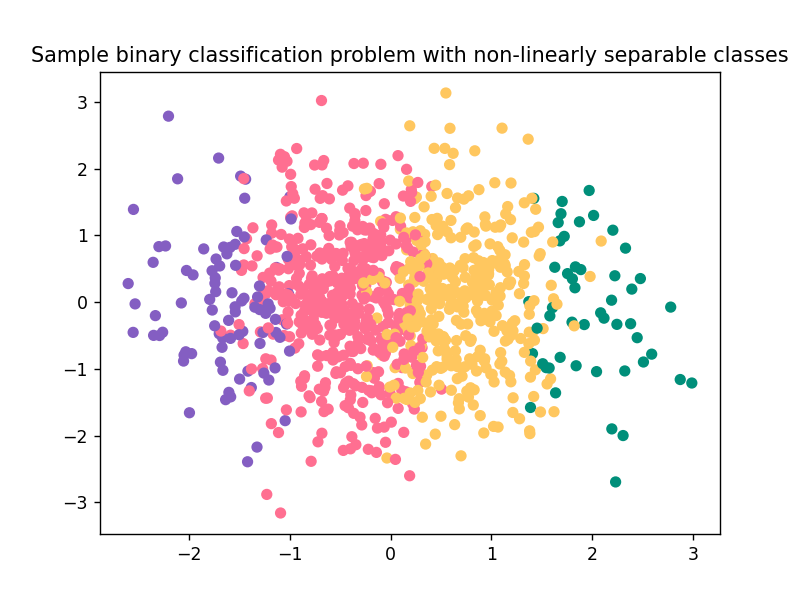

In [11]:
from sklearn.datasets import make_blobs, make_regression
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#845EC2','#FF6F91','#FFC75F','#008F7A'])

np.random.seed= 2021
X_D2, y_D2 = make_regression(n_samples = 1000, n_features = 4, random_state = 4,bias=1.2,n_informative=1, noise=10)
y_D2 = y_D2 
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)



In [12]:
k_best = 0 # 'compute the best k'
score_best = 0 #'compute the best score'
print ('The best k = {} , score = {}'.format(k_best,score_best ))

The best k = 0 , score = 0


In [13]:
#Normalizarion
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_D2 = ss.fit_transform(X_D2)
X_D2

array([[-0.63478854, -0.82130099, -1.47534778, -1.21267325],
       [-0.42731301, -0.18672073, -0.35928544, -0.93488551],
       [-1.2290723 ,  0.42662411,  0.46507978, -0.48038617],
       ...,
       [ 1.74647818,  0.51528035, -0.62949467,  0.51233695],
       [ 0.80873037, -0.99067585, -0.39270463,  0.57962292],
       [-0.50161186,  1.00404466, -0.6235189 ,  1.51546063]])

In [15]:
#devide into sets
from sklearn.model_selection import train_test_split

X_train_D2, X_test_D2, y_train_D2, y_test_D2 = train_test_split(X_D2, y_D2, train_size=0.76, test_size=0.24)

print(f'X_D2 Train - {X_train_D2.shape}')
print(f'X_D2 Test - {X_test_D2.shape}')


X_D2 Train - (760, 4)
X_D2 Test - (240, 4)


In [16]:
#knn regression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_max_value = 20 #we will select best K in range from 1 to 500

for K in range(1, k_max_value + 1): 
    knn_r = KNeighborsRegressor(K) #Create a new isntance of KNN Regressor
    knn_r.fit(X_train_D2, y_train_D2) #Train regressor on our train set

    y_pred_D2 = knn_r.predict(X_test_D2)

    curr_K_mre = mean_squared_error(y_test_D2, y_pred_D2) # Detect current regressor mre
    score = knn_r.score(X_test_D2, y_test_D2)
    if score >  score_best :
        k_best = K
        score_best = score

    #print(f"Current K is {K} and it`s mre equals {curr_K_mre}")

print(f"Best K is {k_best} and it`s mre equals {curr_K_mre}, score {score_best}")

Best K is 6 and it`s mre equals 259.8479474341955, score 0.8972312980630845


<IPython.core.display.Javascript object>


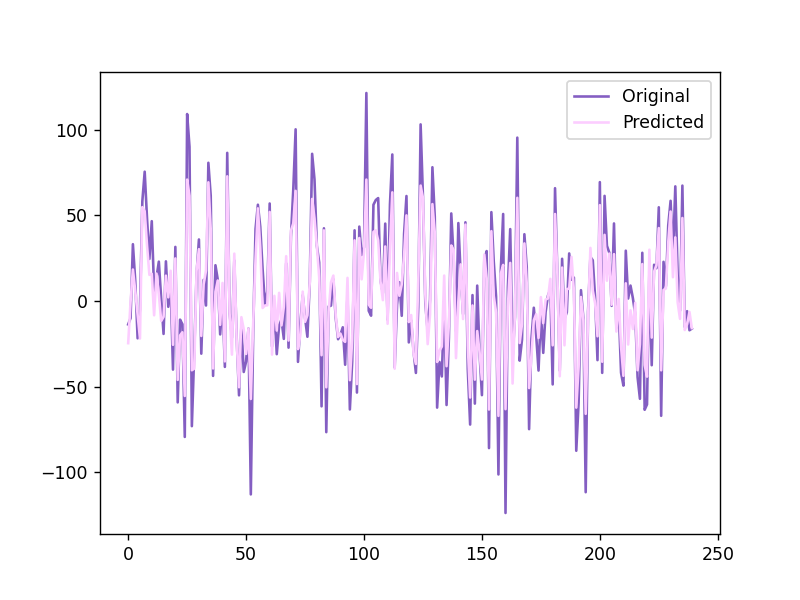

In [19]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(len(y_test_D2)), y_test_D2, lw=1.5, color="#845EC2", label='Original')
plt.plot(range(len(y_pred_D2)), y_pred_D2, lw=1.5, color="#FCCDFF", label='Predicted')
plt.legend()
plt.show()